# <div style="color:#fff;display:fill;border-radius:10px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Content</div>
#### <span style='color:#2E8BC0'>1| </span> [Show data](#section-one)   
#### <span style='color:#2E8BC0'>2| </span> [Balance the data](#section-two) 
#### <span style='color:#2E8BC0'>2| </span> [create the data pipline](#section-three) 
#### <span style='color:#2E8BC0'>3| </span>[Visualize Some images](#section-four)
#### <span style='color:#2E8BC0'>4| </span>[Model building and training](#section-five)
#### <span style='color:#2E8BC0'>5| </span>[Visualize model perfromance on images](#section-six) 

### <span style='color:#2E8BC0'>Team Members</span>
***
#### <span style='color:#2E4053'>Reem ALi</span>
#### <span style='color:#2E4053'>Eman Khaled</span>
#### <span style='color:#2E4053'>Rewan Hosny</span>
#### <span style='color:#2E4053'>Alaa Salah</span>
#### <span style='color:#2E4053'>Mariam Mohamed</span>

<a id="section-two"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%">Show data </div>

### <span style='color:#2E8BC0'> Dateset </span> 

#### The dataset we have is splitted into:
     - train set
     - test set
     - val set
#### The classes are:
    - normal images 
    - pneumonia images

In [9]:
import plotly.express as px 
import os  
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use("ggplot")

# <span style="color:#212F3C"> Collect information about data
***
   

In [10]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA") 
# dictionary 
train_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [11]:
train_images

{'PNEUMONIA': 3875, 'Normal': 1341}

In [12]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/test/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA") 
# dictionary 
test_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [13]:
test_images

{'PNEUMONIA': 390, 'Normal': 234}

In [14]:
#number of normal images 
num_normal = os.listdir("../input/chest-xray-pneumonia/chest_xray/val/NORMAL")
# number of covid [positive] images 
num_covid = os.listdir("../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA") 
# dictionary 
validation_images = {"PNEUMONIA" : len(num_covid) ,
              "Normal" :len(num_normal)
             } 

In [15]:
validation_images

{'PNEUMONIA': 8, 'Normal': 8}

# <span style="color:#212F3C">Show data distribution 
***
   

<BarContainer object of 2 artists>

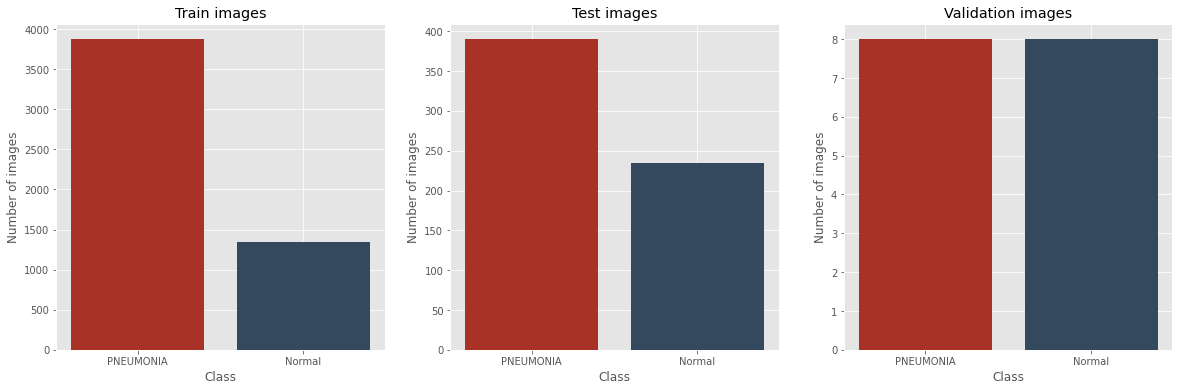

In [16]:
plt.figure(figsize=(20,6))

### show the train images 
plt.subplot(1,3,1)
plt.title("Train images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=train_images.keys(),height=train_images.values(),color=["#A93226","#34495E"])

### show the test images
plt.subplot(1,3,2)
plt.title("Test images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=test_images.keys(),height=test_images.values(),color=["#A93226","#34495E"])

### show the validation images
plt.subplot(1,3,3)
plt.title("Validation images")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=validation_images.keys(),height=validation_images.values(),color=["#A93226","#34495E"])

#### We can  See that there  is  data `imbalance` in the traning dataset

<a id="section-two"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%">Balance the Data</div>

# <span style="color:#212F3C"> Why balance the data ?
***
   

#### we can see form the train data we have `imbalanced data` and the model will overfitt to the `PNEUMONIA` class over the `normal` class
#### We can use many techniques to try to solve this problem.. but we have notices that `PNEUMOIA` images have two classes in it. `BATERIAL & VIRAL PNEUMOIA`  so simply splitting these images into two classes will solve the problem.
#### We will create new folder that contain the new classes of images.
#### The model will take the image and predict wether it is `NORMAL` or` BATERIAL P ` or `VIRAL P` 

### 1| Creating New Training data

In [17]:
# all normal images
all_ns = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
# all p images
all_ps = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")

In [18]:
os.mkdir("./train")
os.mkdir("./train/NORMAL")
os.mkdir("./train/baterial pneumonia")
os.mkdir("./train/virus pneumonia")

In [19]:
import shutil 

In [20]:
source_normal_path ="../input/chest-xray-pneumonia/chest_xray/train/NORMAL"
source_p_path = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

In [21]:
# get the bacterial and visurs images 
def get_b_v(all_images):
    virus = []
    bateria = []
    for image in all_images:
        c = image.split("_")[1]
        if c =="virus":
            virus.append(image)
        elif c == "bacteria":
            bateria.append(image)  
    return bateria , virus 

In [22]:
bacteria_images , virus_images = get_b_v(all_ps)

In [23]:
# check if we got all the images
len(all_ps) == len(bacteria_images) + len(virus_images)

True

In [29]:
# now copy the images to the new path 
for image in all_ns[:1340]: 
    shutil.copyfile(os.path.join(source_normal_path,image),os.path.join("./train/NORMAL",image)) 

In [30]:
for image in bacteria_images[:1340]:
    shutil.copyfile(os.path.join(source_p_path,image),os.path.join("./train/baterial pneumonia",image)) 

In [31]:
for image in virus_images[:1340]:
    shutil.copyfile(os.path.join(source_p_path,image),os.path.join("./train/virus pneumonia",image)) 

In [32]:
# collect info 
train_modified = {
    "normal": len(os.listdir("./train/NORMAL")),
    "bareial p": len(os.listdir("./train/baterial pneumonia")),
    "virus p": len(os.listdir("./train/virus pneumonia"))
}

In [33]:
train_modified

{'normal': 1341, 'bareial p': 1340, 'virus p': 1340}

### 2|  Creatint new Test data

In [34]:
# all normal images
all_ns_test = os.listdir("../input/chest-xray-pneumonia/chest_xray/test/NORMAL")
# all p images
all_ps_test= os.listdir("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA")

In [35]:
os.mkdir("./test")
os.mkdir("./test/NORMAL")
os.mkdir("./test/baterial pneumonia")
os.mkdir("./test/virus pneumonia")
source_normal_path_test ="../input/chest-xray-pneumonia/chest_xray/test/NORMAL"
source_p_path_test = "../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"

In [36]:
# get the bacterial and visurs images 
def get_b_v(all_images):
    virus = []
    bateria = []
    for image in all_images:
        c = image.split("_")[1]
        if c =="virus":
            virus.append(image)
        elif c == "bacteria":
            bateria.append(image)  
    return bateria , virus 

In [37]:
bacteria_images_test , virus_images_test = get_b_v(all_ps_test)

In [38]:
len(bacteria_images_test), len(virus_images_test) , len(all_ps_test)

(242, 148, 390)

In [39]:
# check if we got all the images
len(all_ps_test) == len(bacteria_images_test) + len(virus_images_test) 

True

In [40]:
 #now copy the images to the new path 
for image in all_ns_test:
    shutil.copyfile(os.path.join(source_normal_path_test,image),os.path.join("./test/NORMAL",image)) 
##--------------------
for image in bacteria_images_test:
    shutil.copyfile(os.path.join(source_p_path_test,image),os.path.join("./test/baterial pneumonia",image)) 
##------------------
for image in virus_images_test:
    shutil.copyfile(os.path.join(source_p_path_test,image),os.path.join("./test/virus pneumonia",image))

In [41]:
# collect info 
test_modified = {
    "normal": len(all_ns_test),
    "bareial p": len(bacteria_images_test),
    "virus p": len(virus_images_test)
}

In [42]:
test_modified

{'normal': 234, 'bareial p': 242, 'virus p': 148}

# <span style="color:#212F3C"> Why balance the data ?
***
   

<BarContainer object of 3 artists>

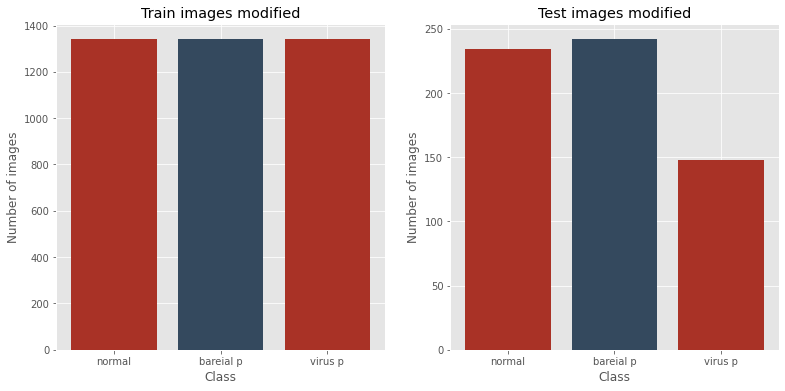

In [43]:
plt.figure(figsize=(20,6))

### show the train images 
plt.subplot(1,3,1)
plt.title("Train images modified")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=train_modified.keys(),height=train_modified.values(),color=["#A93226","#34495E"])

### show the test images
plt.subplot(1,3,2)
plt.title("Test images modified")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.bar(x=test_modified.keys(),height=test_modified.values(),color=["#A93226","#34495E"])


### Now we have `balanced dataset` of three classes [ normal , baterial pneumonia , viral pneumonia ] 

<a id="section-three"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%">Create data pipline</div>

In [45]:
import tensorflow as tf 

#### Training data pipline

In [46]:
# create the training data from the folder
train_ds = tf.keras.utils.image_dataset_from_directory(
  "./train", # the new directory of the train images
  seed=123,
  image_size=(256, 256), # the image output size 
  batch_size=32, 
  shuffle=True # to shuffle the images when feeded to the model
)

Found 4021 files belonging to 3 classes.


2022-05-26 21:29:48.535180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 21:29:48.540100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 21:29:48.540841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-26 21:29:48.543269: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

#### Test data pipline

In [51]:
# create the training data from the folder
test_ds = tf.keras.utils.image_dataset_from_directory(
  "./test", # new directory for the test images
  seed=123,
  image_size=(256, 256),
  batch_size=32,
  shuffle=True
)

Found 624 files belonging to 3 classes.


In [49]:
# get the classes names form the data 
classes=train_ds.class_names 
classes  

['NORMAL', 'baterial pneumonia', 'virus pneumonia']

#### Optimize the data pipline for faset training 

In [52]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<a id="section-four"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize some images</div>

#### <span style='color:#2E8BC0'>Show some images from the data </span>

2022-05-26 21:31:05.550660: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


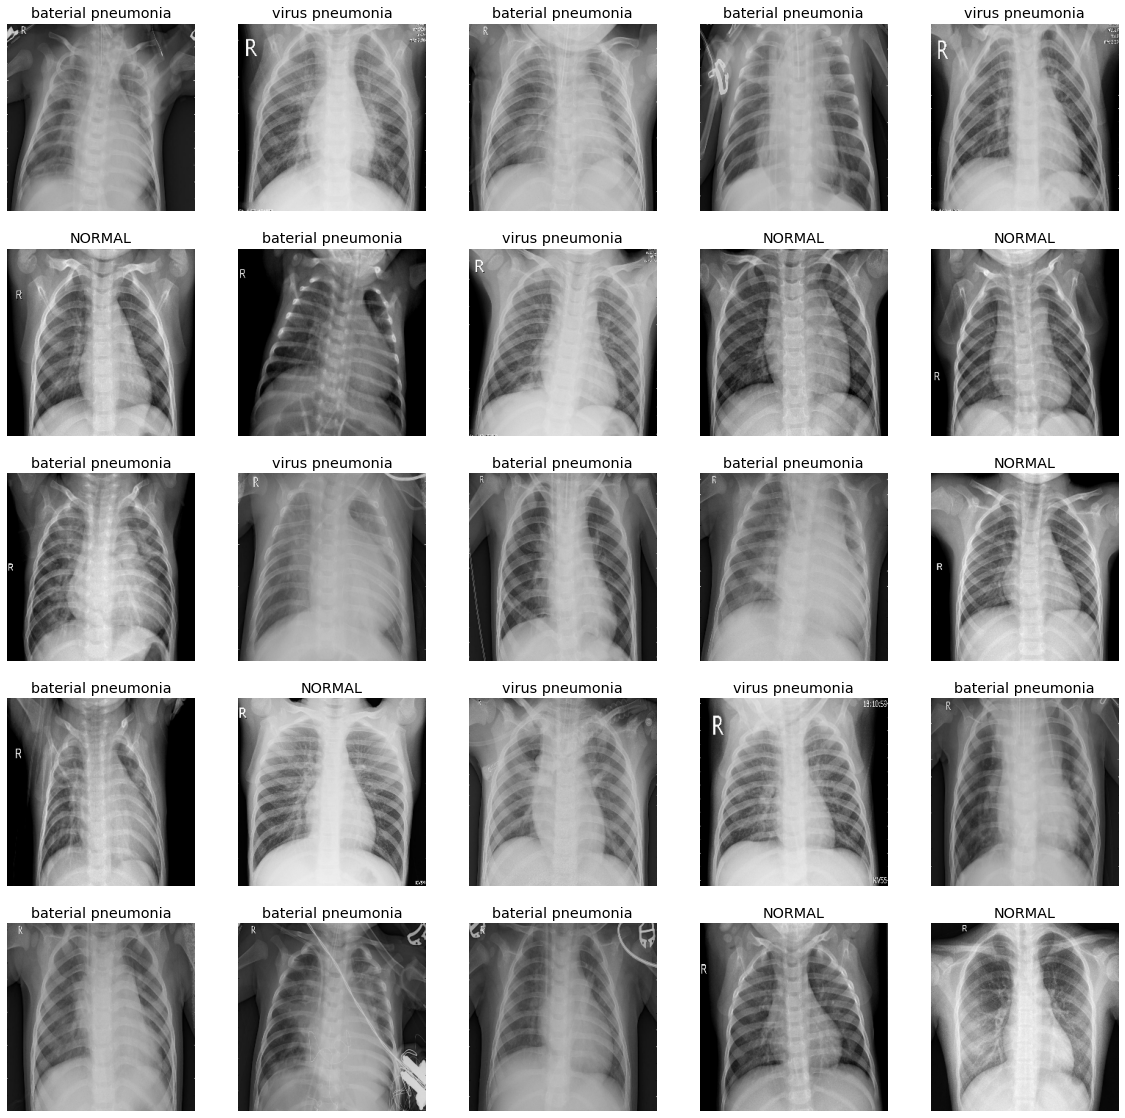

In [53]:
# show 24 images from the data
plt.figure(figsize=(20,20))
for images, labels in train_ds.take(1) :
    # create a grid of 5x5 images
    for i in range(0,25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("u8"))
        plt.title(classes[labels[i]])
        plt.axis('off')
    # show the plot
    plt.show()
    break

<a id="section-fife"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%"> Build and Train the Model</div>

### Using the principle of transfer learning , we will use <span style="color:red">Xception Model </span> and remove the output layers 

In [54]:
# load the VGG16 model from tensorflow 
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Dense, Flatten, Input, AveragePooling2D,GlobalAveragePooling2D ,BatchNormalization

#### Show the Xception model architcture 


91897856/91884032 [==============================] - 2s 0us/step


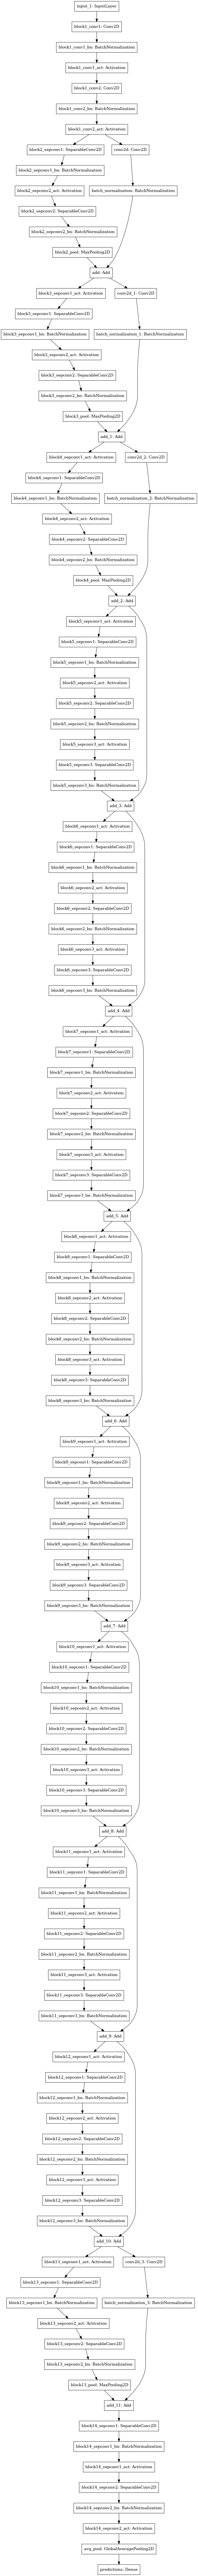

In [55]:
xception_model = Xception()
from tensorflow.keras.utils import plot_model
plot_model(xception_model,to_file="./xception_model.png")

#### <span style='color:#2E8BC0'>Import the Xception model and change output layers
</span>

<span style="color:red;font-size:15px"> we will let the last 20 layers of the xception model to be trained and use the imagenet weights as initial weights, Sure this will Enhance the model `peformance`</span>

In [56]:
# define the model without it top dense layers 
input_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256,3)))
# build the VGG16 model as input of the new model
x = input_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(3, activation="softmax")(x)

model = Model(inputs=input_model.input, outputs=x)
# we don not want the VGG16 model to be trained, only traning the top few layers 
# the next code will not let the model to train the layers of the model, except [last_10_conv_layers and dense_layers ]
for layer in input_model.layers[:-20]:
    layer.trainable = False


83697664/83683744 [==============================] - 1s 0us/step


#### <span style='color:#2E8BC0'>Show the model structure , weights .. </span>

In [58]:
model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [57]:
# compile the model 
model.compile(
              optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = [
                            'accuracy', # show the overall accuracy
                            tf.keras.metrics.Precision(name='precision'), # show the precesion in each epoch
                            tf.keras.metrics.Recall(name='recall') # show the recal in each epoch
                        ]
             )

#### <span style='color:#2E8BC0'>`Callbacks` to store model best performane </span>

In [59]:
# callbacks 
check=tf.keras.callbacks.ModelCheckpoint("./best_weights_2.h5",monitor="val_accuracy")
callback = [check] 

## <span style='color:#2E8BC0'>Start Training the model </span>

##### We will take the validation set to be some of the test set and the validation images is so small 

In [61]:
history=model.fit(train_ds, # the  generator
                  validation_data=test_ds.take(8), # take [8 batches from the images = 8*32 = 256 images] as validation set
                  epochs=20, # number of tranings over all the dataset 
                  callbacks=callback, # to save best weights
                  verbose = 1 # to show the history of the model
                  )

Epoch 1/20
20/20 [==============================] - 3s 157ms/step - loss: 0.0521 - accuracy: 0.9824 - val_loss: 1.2627 - val_accuracy: 0.7695
Epoch 2/20
20/20 [==============================] - 3s 156ms/step - loss: 0.0223 - accuracy: 0.9984 - val_loss: 0.2672 - val_accuracy: 0.8789
Epoch 3/20
20/20 [==============================] - 3s 157ms/step - loss: 0.0115 - accuracy: 0.9984 - val_loss: 0.0572 - val_accuracy: 0.9766
Epoch 4/20
20/20 [==============================] - 3s 157ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 3s 156ms/step - loss: 8.9312e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 3s 159ms/step - loss: 6.2605e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 3s 154ms/step - loss: 5.0151e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1

#### <span style='color:#2E8BC0'>Show model performance `History` </span>

Text(0.5, 1.0, 'Accuraccy Curve')

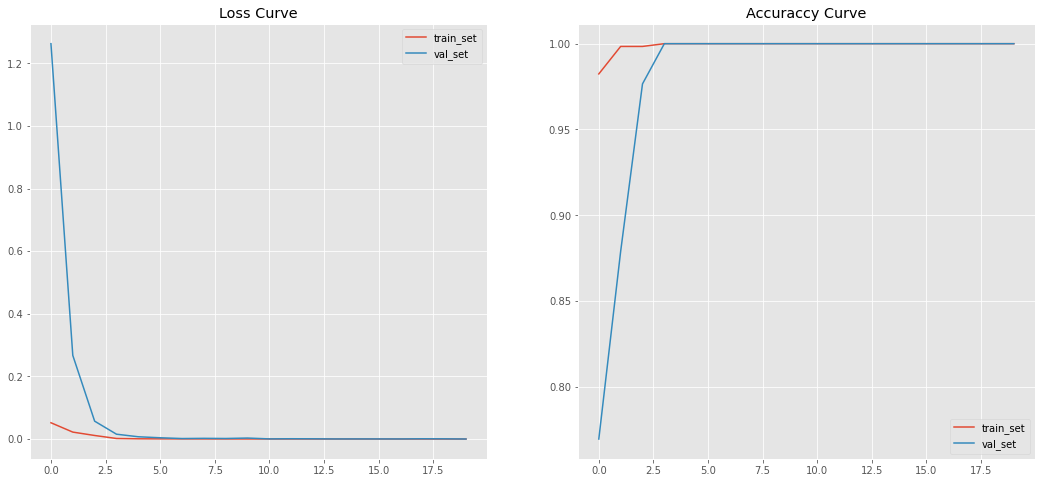

In [62]:
plt.style.use("ggplot")
plt.figure(figsize=(18, 8))
# the loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_set')
plt.plot(history.history['val_loss'], label='val_set')
plt.legend()
plt.title('Loss Curve')
# the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_set')
plt.plot(history.history['val_accuracy'], label='val_set')
plt.legend()
plt.title('Accuraccy Curve')

#### <span style='color:#2E8BC0'>Show model predictions on `Test images` </span>

In [63]:
model.evaluate(test_ds)

20/20 [==============================] - 2s 94ms/step - loss: 4.9203e-04 - accuracy: 1.0000


[0.0004920348874293268, 1.0]

<a id="section-fife"></a>
# <div style="color:#fff;display:fill;border-radius:15px;background-color:#566573;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:15px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize model performance on images</div>

In [67]:
import numpy as np 

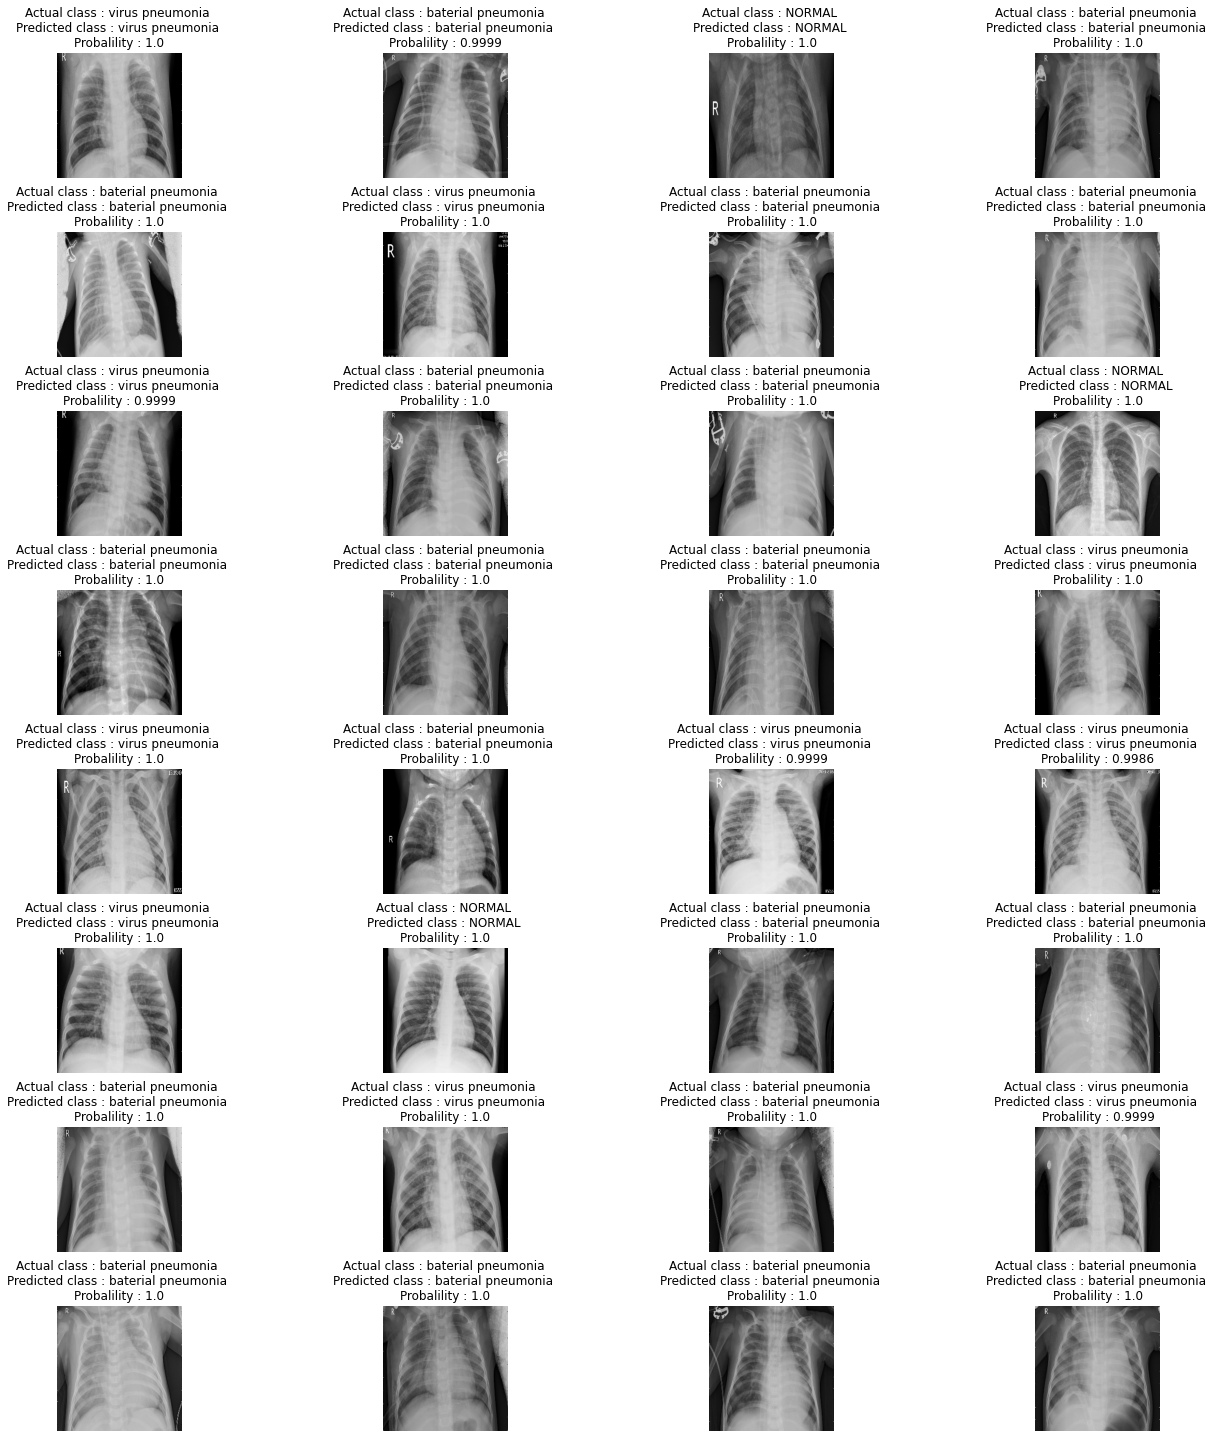

In [74]:
# showing some predictions
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(32):
        plt.subplot(8,4,i+1)
        # plot the image
        plt.imshow(images[i].numpy().astype('u8'))
        # get the probalilities of all images
        predictions=model.predict(images)
        # get the index of the maximum probalility of the this images and show the name
        predicted_class=classes[np.argmax(predictions[i])]
        # the probalility of this class
        prob= round(np.max(predictions[i]),4)
        # get the actual class of the image
        actual_class= classes[labels[i]] 
        plt.title(f"Actual class : {actual_class} \nPredicted class : {predicted_class} \nProbalility : {np.round(float(prob),4)}",fontsize=12)
        plt.axis('off')
plt.tight_layout(pad=.8)